In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv("OnlineNewsPopularity_trimmed.csv")
df = df.drop([31037, 16281, 16294, 16268], axis = 0)
max_share_limit = 400000
df = df.drop(df[df["shares"] > max_share_limit].index, axis = 0)
df = df.drop(df[df["num_hrefs"] > 300].index, axis = 0)
df = df.drop(df[df["self_reference_min_shares"] > 400000].index, axis = 0)
df = df.drop(df[df["self_reference_max_shares"] > 400000].index, axis = 0)
df = df.drop(df[df["self_reference_avg_sharess"] > 400000].index, axis = 0)
df = df.drop(["url"], axis = 1)
df = df.drop(["n_non_stop_words"], axis = 1)
df = df.drop(df[df["average_token_length"] ==0].index, axis = 0)
#df = df[:10000]

In [48]:
df_weekdays = df[["weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday", "weekday_is_friday", "weekday_is_saturday", "weekday_is_sunday"]]
df["weekdays"] = pd.from_dummies(df_weekdays, sep = "_is_")

In [49]:
channel = df[["data_channel_is_lifestyle", "data_channel_is_entertainment", "data_channel_is_bus", "data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world"]]
df["channel"] = pd.from_dummies(channel, sep = "_is_", default_category="none")

In [80]:
df["shares_log"] = np.log2(df['shares'])

In [81]:
df.head()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0        731              12               219         0.663594   
1        731               9               255         0.604743   
2        731               9               211         0.575130   
3        731               9               531         0.503788   
4        731              13              1072         0.415646   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385          4               2         1           0   
1                  0.791946          3               1         1           0   
2                  0.663866          3               1         1           0   
3                  0.665635          9               0         1           0   
4                  0.540890         19              19        20           0   

   average_token_length  ...  min_negative_polarity  max_negative_polarity  \
0              4.680365  ...                 -0.600              -0.200000   
1              4.913725  ...                 -0.125              -0.100000   
2              4.393365  ...                 -0.800              -0.133333   
3              4.404896  ...                 -0.600              -0.166667   
4              4.682836  ...                 -0.500              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  weekdays        channel  shares_log  
0                      0.187500     593    monday  entertainment    9.211888  
1                      0.000000     711    monday            bus    9.473706  
2                      0.000000    1500    monday            bus   10.550747  
3                      0.000000    1200    monday  entertainment   10.228819  
4                      0.136364     505    monday           tech    8.980140  

[5 rows x 62 columns]

count     38338.000000
mean       3249.038161
std        8142.924027
min           1.000000
25%         944.000000
50%        1400.000000
75%        2700.000000
max      310800.000000
Name: shares, dtype: float64

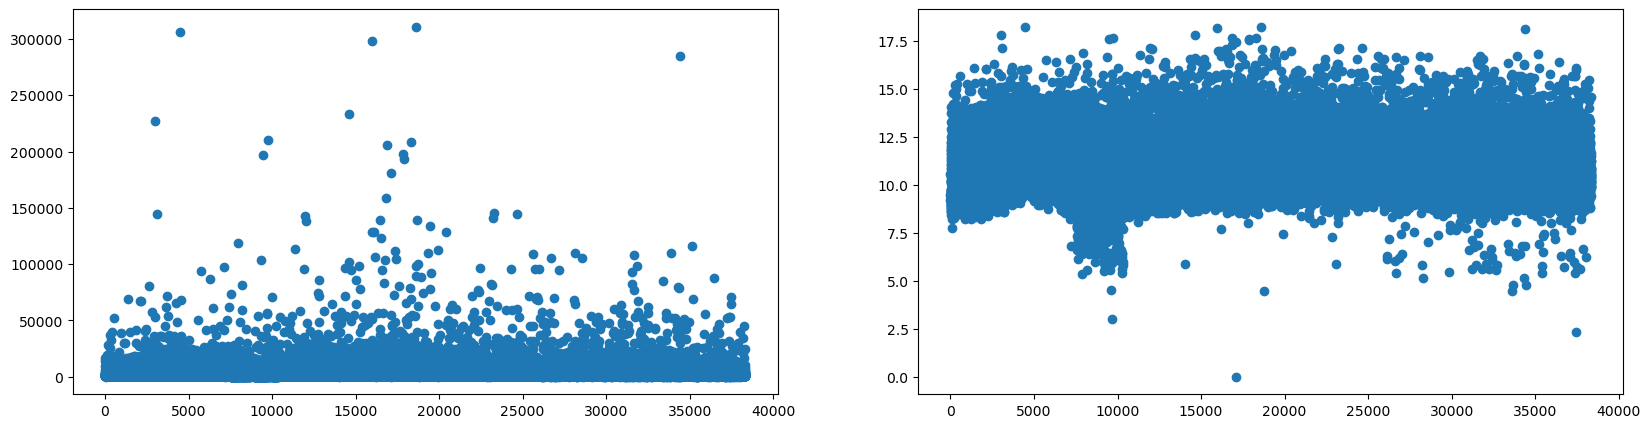

In [82]:
plt.figure(figsize=(20,5))
plt.subplot(1,2, 1)
plt.scatter(range(len(df)), df["shares"])
plt.subplot(1,2, 2)
plt.scatter(range(len(df)), np.log2(df['shares']))

df["shares"].describe()

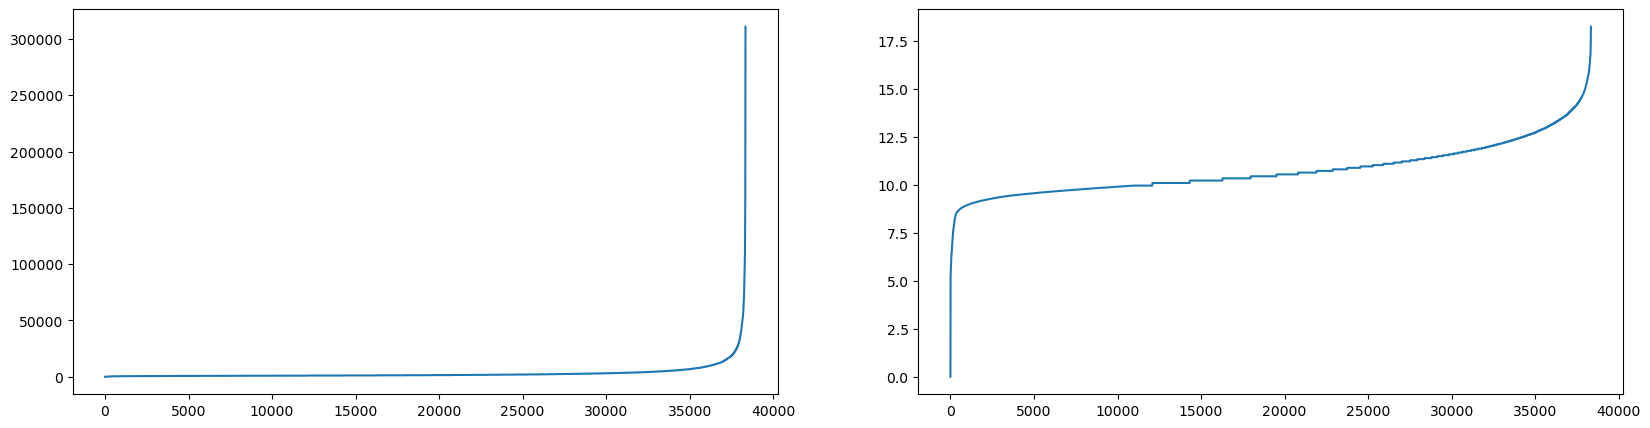

In [108]:
plt.figure(figsize=(20,5))
plt.subplot(1,2, 1)
plt.plot(np.sort(df['shares']))
plt.subplot(1,2, 2)
plt.plot(np.sort(np.log2(df['shares'])))

(array([ 418., 5055., 8849., 6477., 3733., 2484., 1782., 1316., 1025.,
         868.]),
 array([1.0000e+00, 3.9090e+02, 7.8080e+02, 1.1707e+03, 1.5606e+03,
        1.9505e+03, 2.3404e+03, 2.7303e+03, 3.1202e+03, 3.5101e+03,
        3.9000e+03]),
 <BarContainer object of 10 artists>)

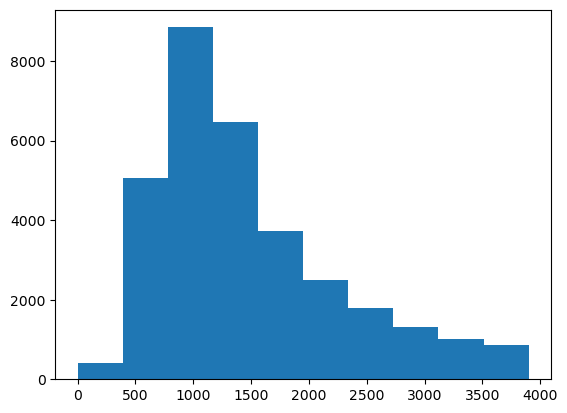

In [123]:
#df['shares'][df['shares']<30000]
plt.hist(np.sort(df['shares'][df['shares']<4000]))

# Categorize the shares into different levels
Exceptional = Top 95%
Excellent = Top 90%
Very Good = Top 80%
Good = Top 60%
Average = Top 50%
Poor = Top 35%
Very Poor = Rest

In [7]:
def categorize_share(share):
    if share <= 50000:
        return "Level1"       
    elif share > 5000 and share <= 10000:
        return "Level2"
    elif share > 10000 and share <= 20000:
        return "Level3"
    elif share > 20000 and share <= 40000:
        return "good"
    elif share > 31300 and share <= 53700:
        return "very good"
    elif share > 53700 and share <= 77200:
        return "excellent"
    else:
        return "Exceptional"        

df["shares_cat"] = df['shares'].apply(categorize_share)
df.head()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0        731              12               219         0.663594   
1        731               9               255         0.604743   
2        731               9               211         0.575130   
3        731               9               531         0.503788   
4        731              13              1072         0.415646   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385          4               2         1           0   
1                  0.791946          3               1         1           0   
2                  0.663866          3               1         1           0   
3                  0.665635          9               0         1           0   
4                  0.540890         19              19        20           0   

   average_token_length  ...  min_negative_polarity  max_negative_polarity  \
0              4.680365  ...                 -0.600              -0.200000   
1              4.913725  ...                 -0.125              -0.100000   
2              4.393365  ...                 -0.800              -0.133333   
3              4.404896  ...                 -0.600              -0.166667   
4              4.682836  ...                 -0.500              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  weekdays        channel  shares_cat  
0                      0.187500     593    monday  entertainment   very poor  
1                      0.000000     711    monday            bus        poor  
2                      0.000000    1500    monday            bus        good  
3                      0.000000    1200    monday  entertainment     average  
4                      0.136364     505    monday           tech   very poor  

[5 rows x 62 columns]

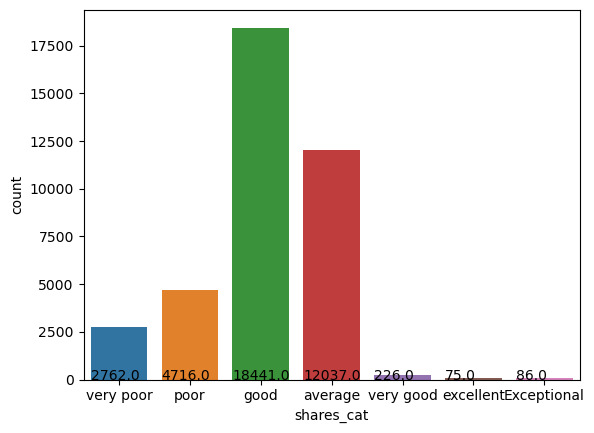

In [9]:
splot = sns.countplot(data = df,x = "shares_cat")
for p in splot.patches:
    #print(p.get_xy())
    splot.annotate(p.get_height(), p.get_xy())
    pass

<Axes: ylabel='shares_log'>

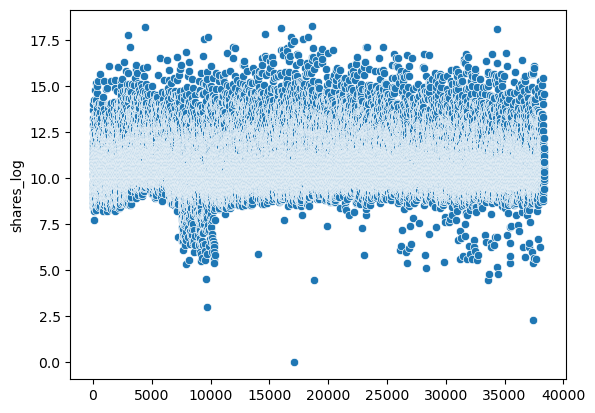

In [84]:
sns.scatterplot(data = df,y = "shares_log", x = range(len(df)))

<Figure size 2000x500 with 0 Axes>

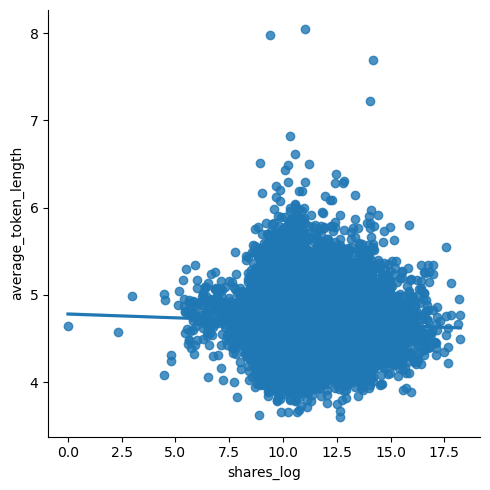

In [92]:
plt.figure(figsize=(20,5))
sns.lmplot(df, x = "shares_log", y = "average_token_length")

<Axes: xlabel='num_imgs', ylabel='shares_log'>

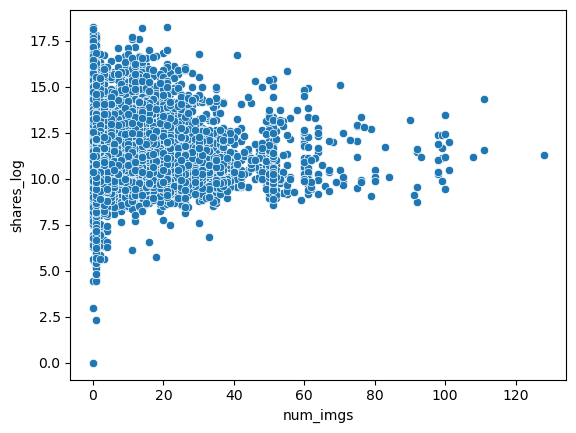

In [87]:
sns.scatterplot(df, x = "num_imgs", y = "shares_log")
# good shares article 0 to 35 images, and 0 to 30 videos, so no much relates

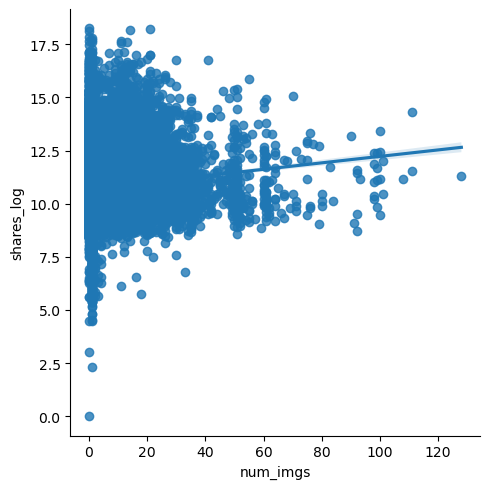

In [90]:
sns.lmplot(df, x = "num_imgs", y = "shares_log")

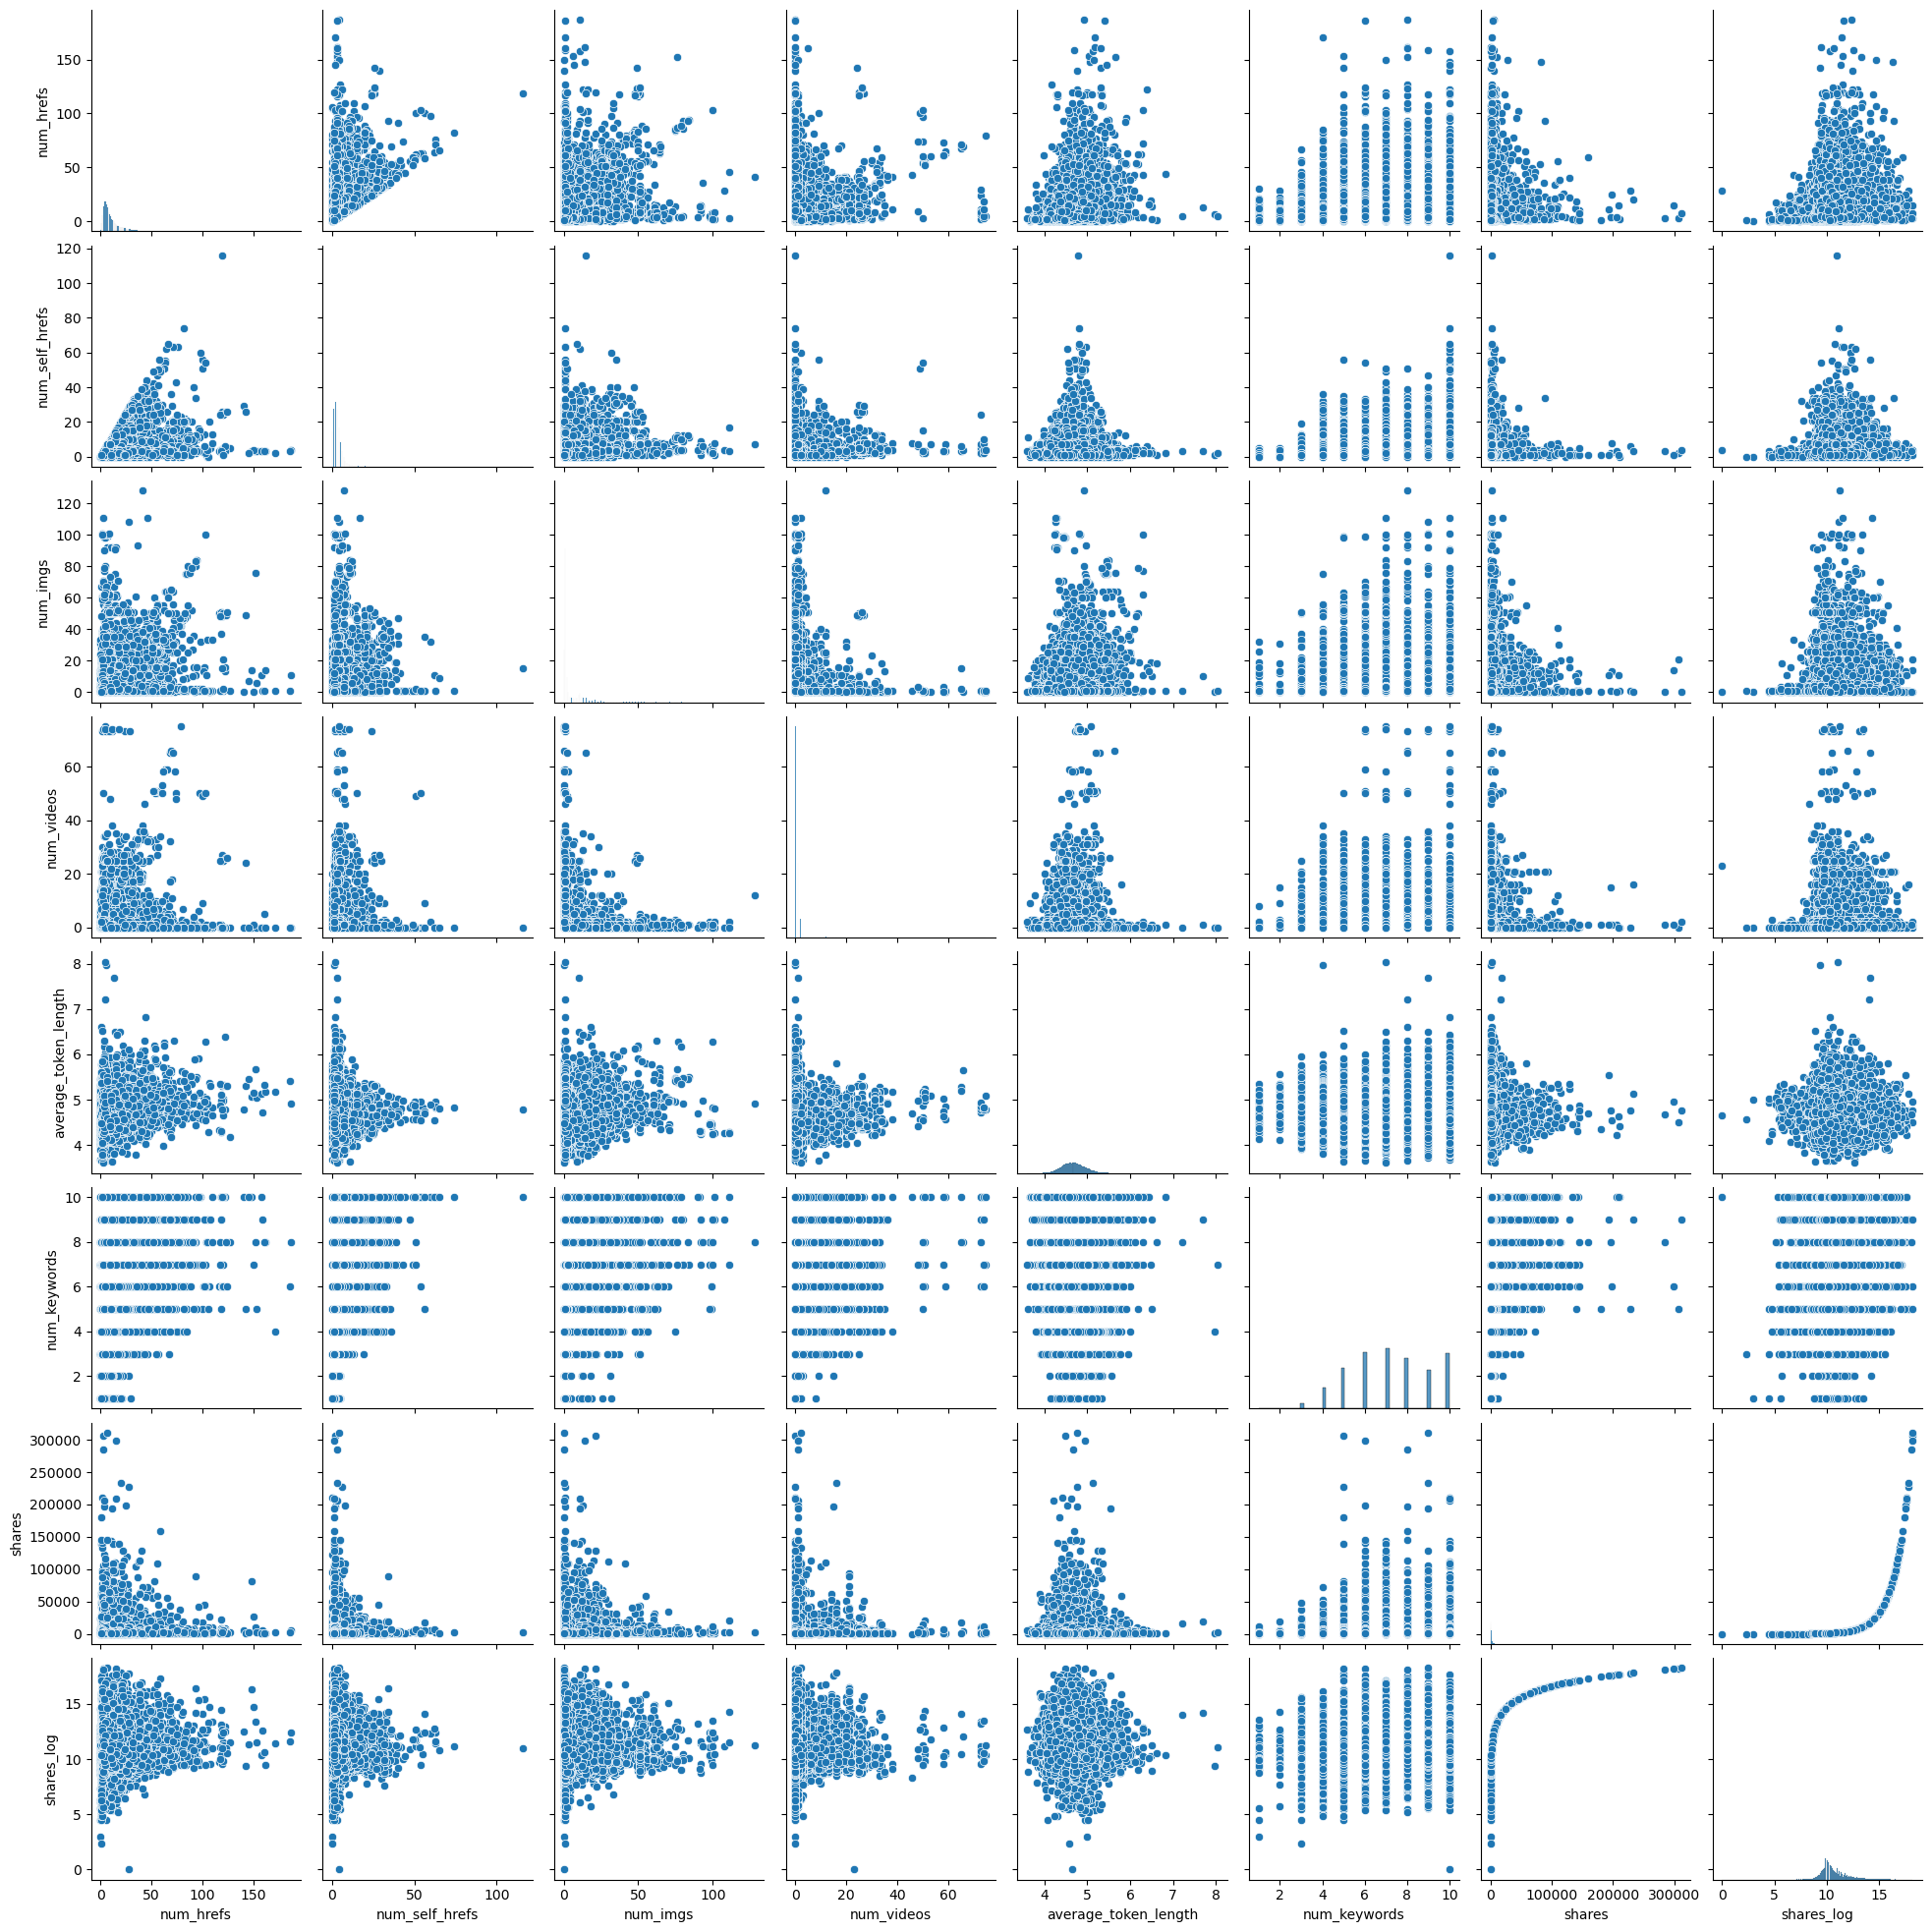

In [126]:
num = ["num_hrefs", "num_self_hrefs", "num_imgs", "num_videos", "average_token_length", "num_keywords", "shares", "shares_log"]
sns.pairplot(df, vars=num)

In [146]:
num = ["num_hrefs", "num_self_hrefs", "num_imgs", "num_videos", "average_token_length", "num_keywords"]
num[0]

'num_hrefs'

<Figure size 640x480 with 0 Axes>

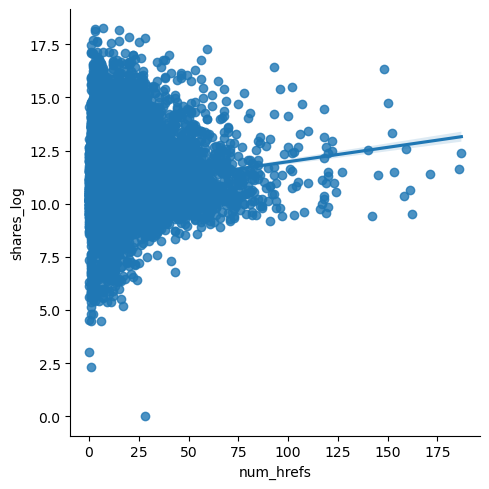

<Figure size 640x480 with 0 Axes>

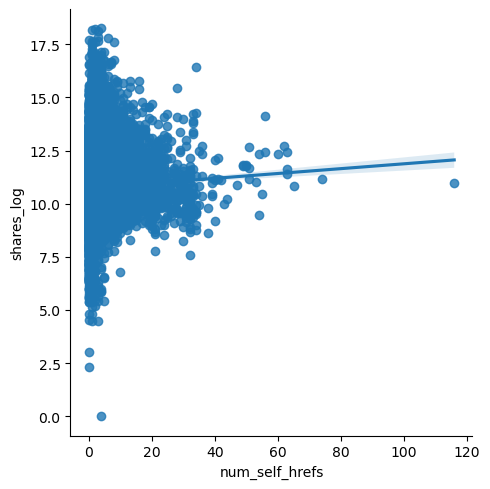

<Figure size 640x480 with 0 Axes>

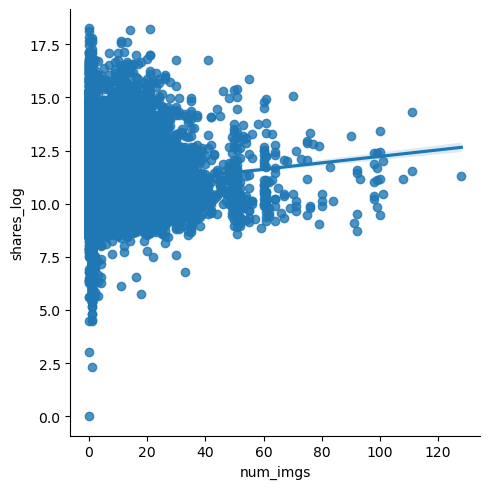

<Figure size 640x480 with 0 Axes>

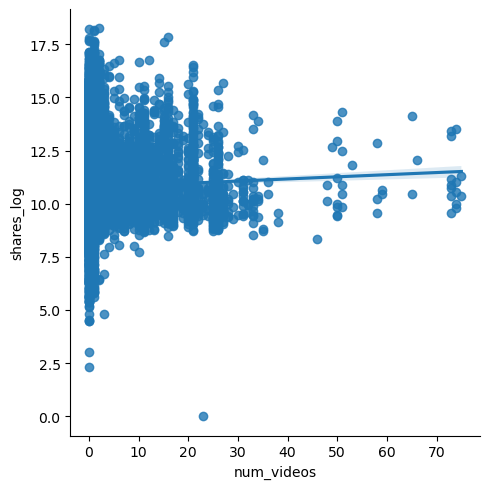

<Figure size 640x480 with 0 Axes>

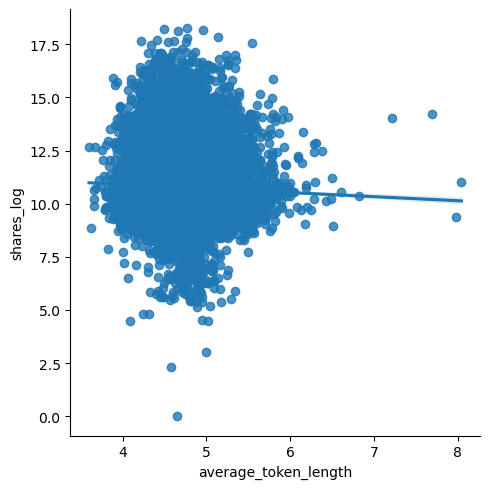

In [161]:
num = ["num_hrefs", "num_self_hrefs", "num_imgs", "num_videos", "average_token_length", "num_keywords"]

row_plot = 2
col_plot = 3
for i in range(0,5):
    #for j in range(0,col_plot):
        #plt.subplot(row_plot,col_plot, (i*col_plot+1)+j)
        #sns.scatterplot(df, y = "shares_log", x = num[(i*col_plot)+j])
        #print(row_plot, col_plot, num[(i*col_plot)+j])
    plt.figure()
    sns.lmplot(df, y = "shares_log", x = num[i])

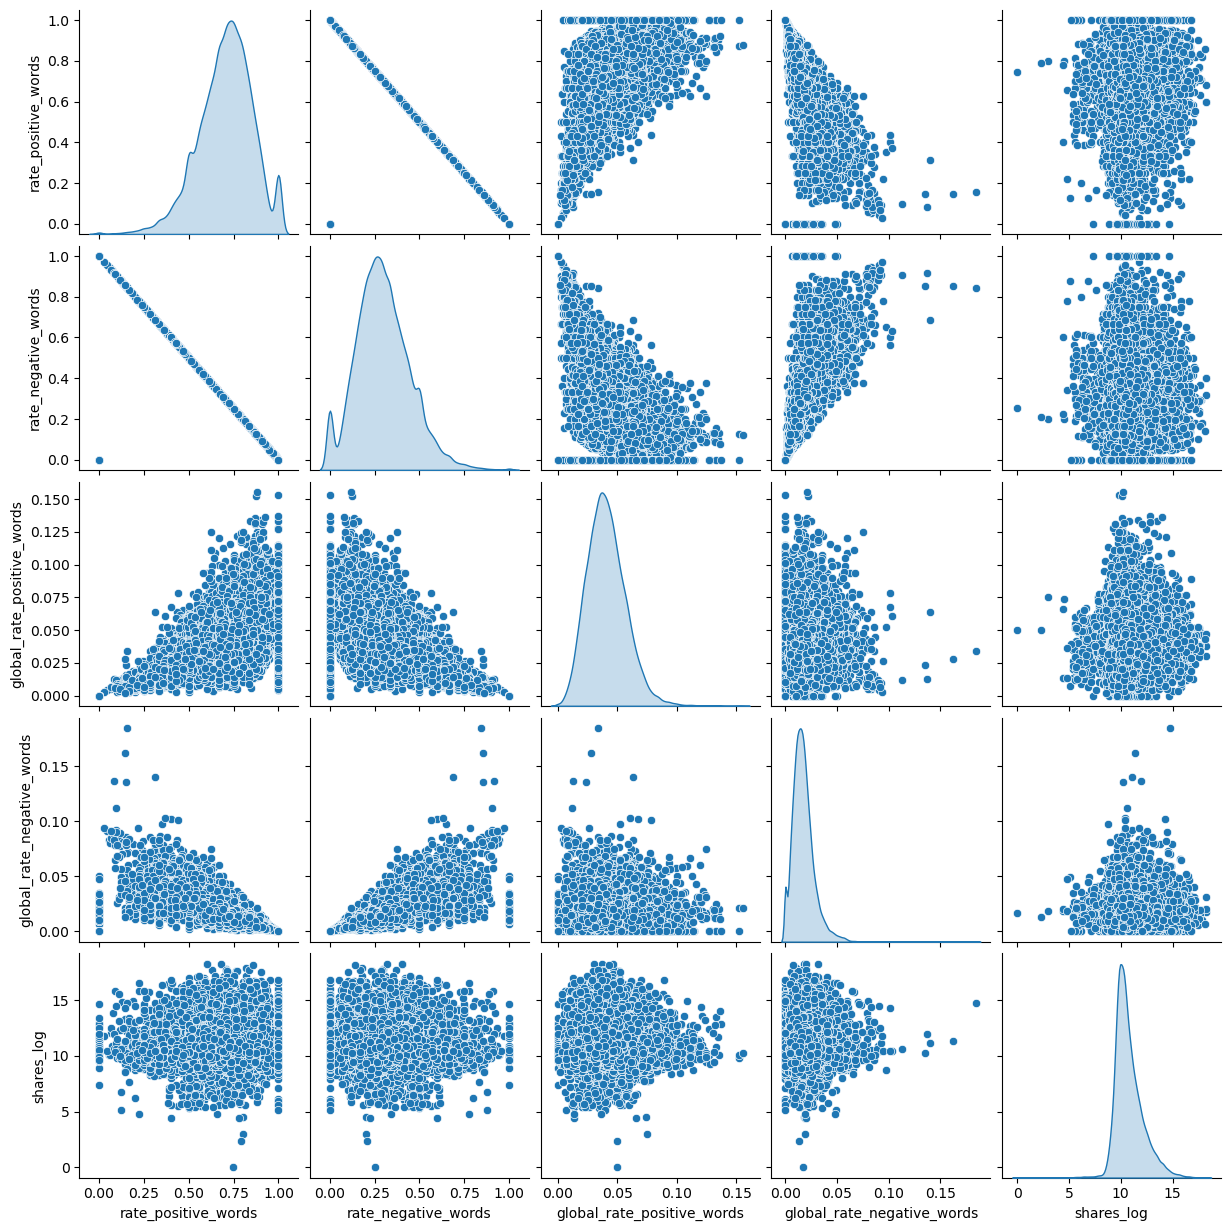

In [164]:
kw_cols = ['rate_positive_words', 'rate_negative_words', 'global_rate_positive_words', 'global_rate_negative_words', 'shares_log']
sns.pairplot(df, vars=kw_cols, diag_kind='kde')

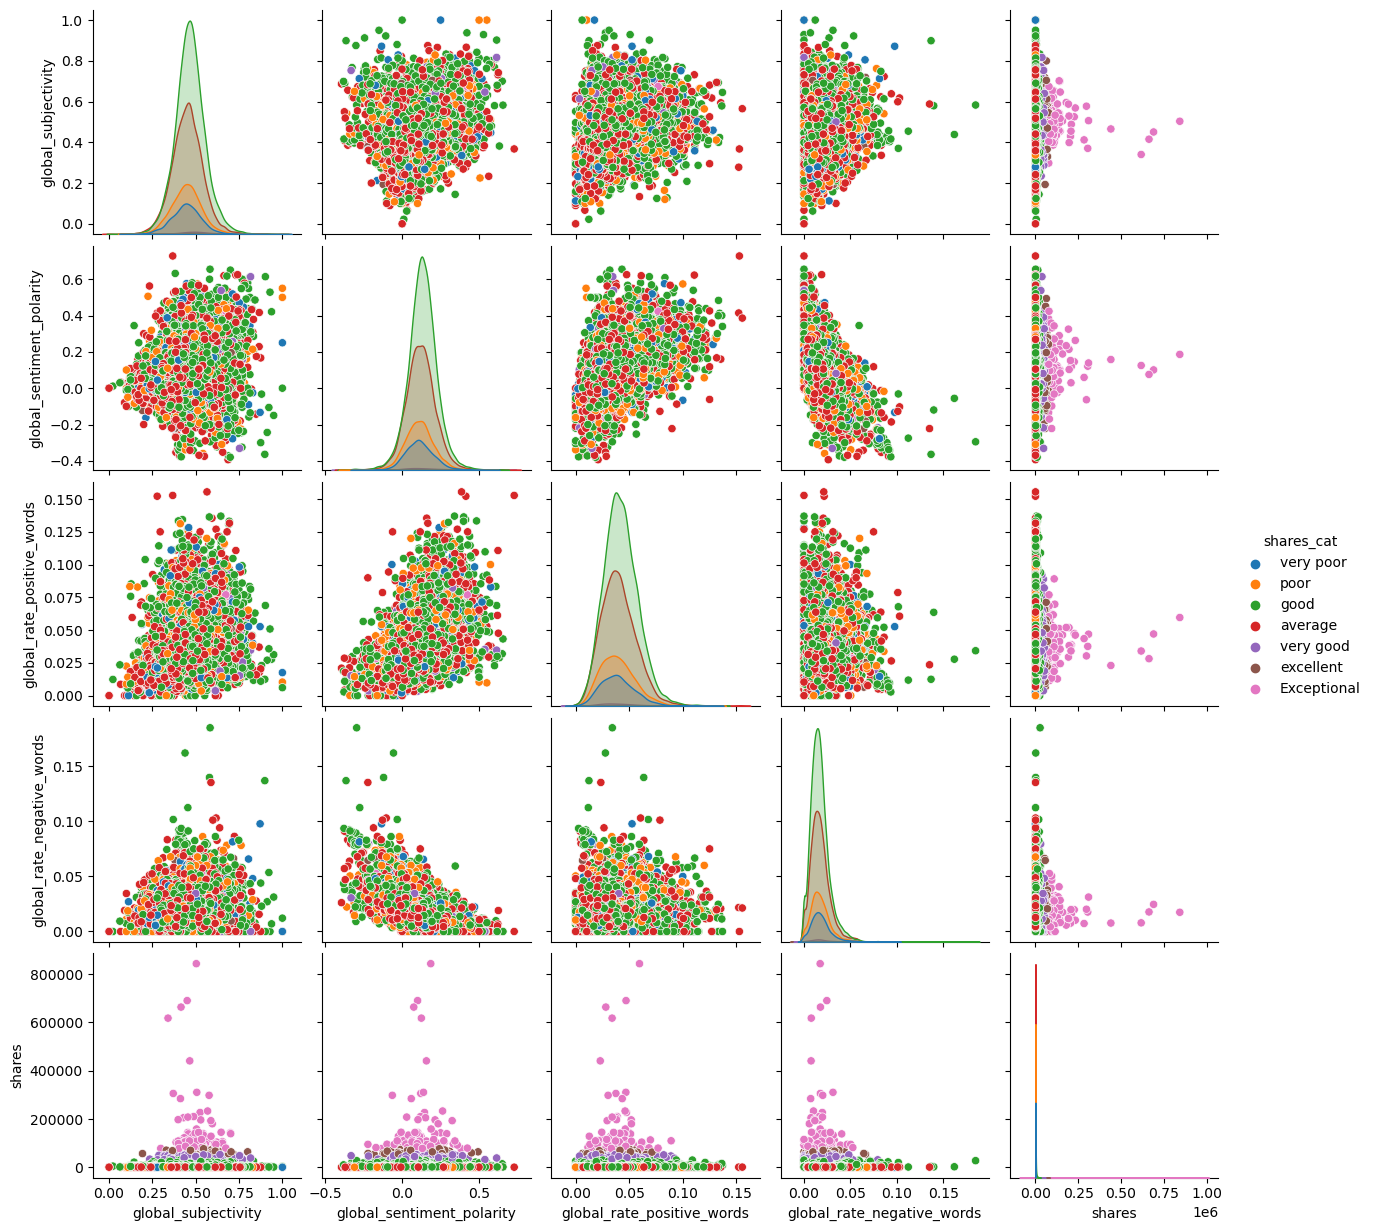

In [43]:
global_ = ["global_subjectivity", "global_sentiment_polarity", "global_rate_positive_words", "global_rate_negative_words", "shares"]
sns.pairplot(df, vars=global_, hue='shares_cat', diag_kind='kde')

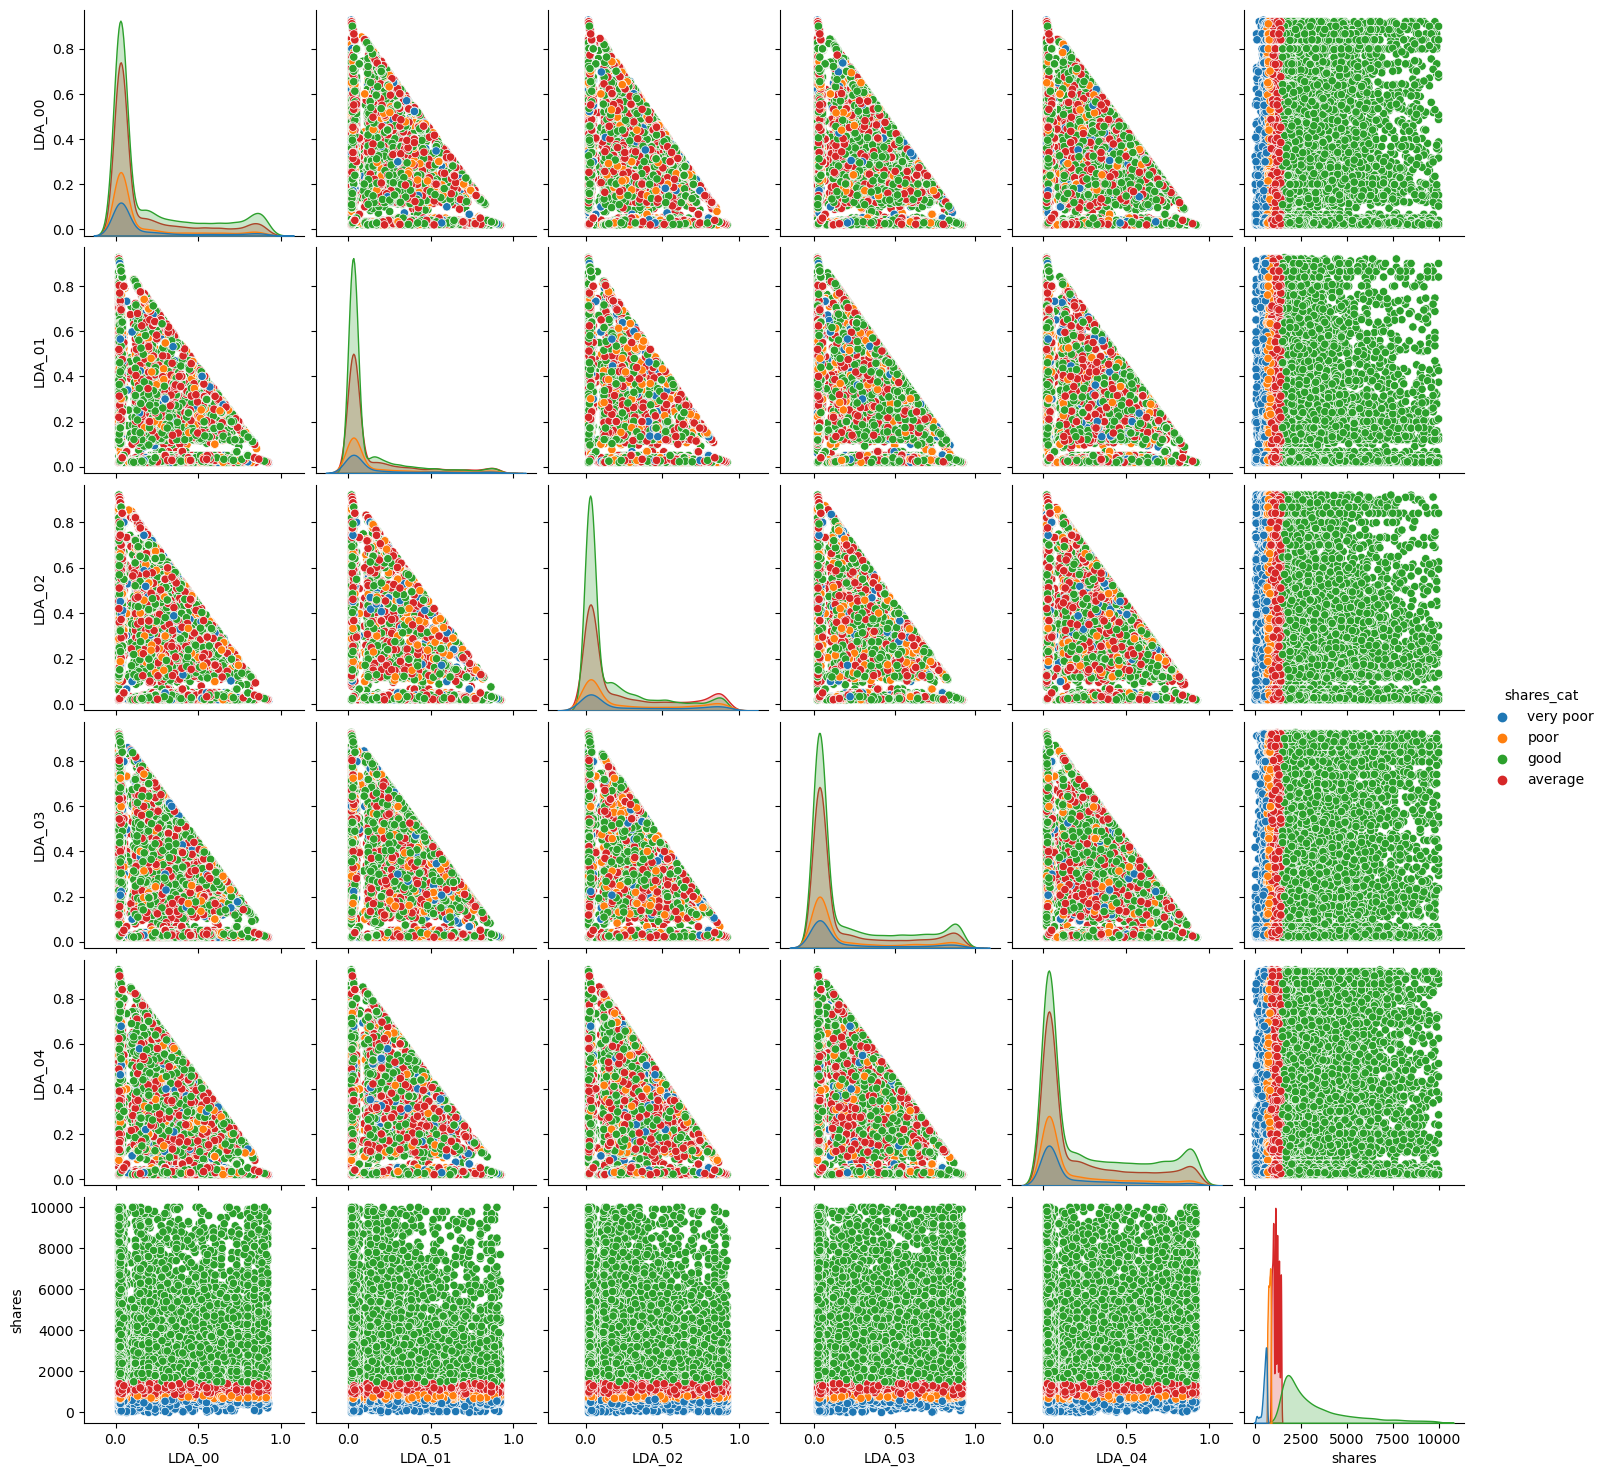

In [41]:
dat = df[df["shares"] <= 10000]
LDA = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', "LDA_04", 'shares']
sns.pairplot(dat, vars=LDA, hue='shares_cat', diag_kind='kde')

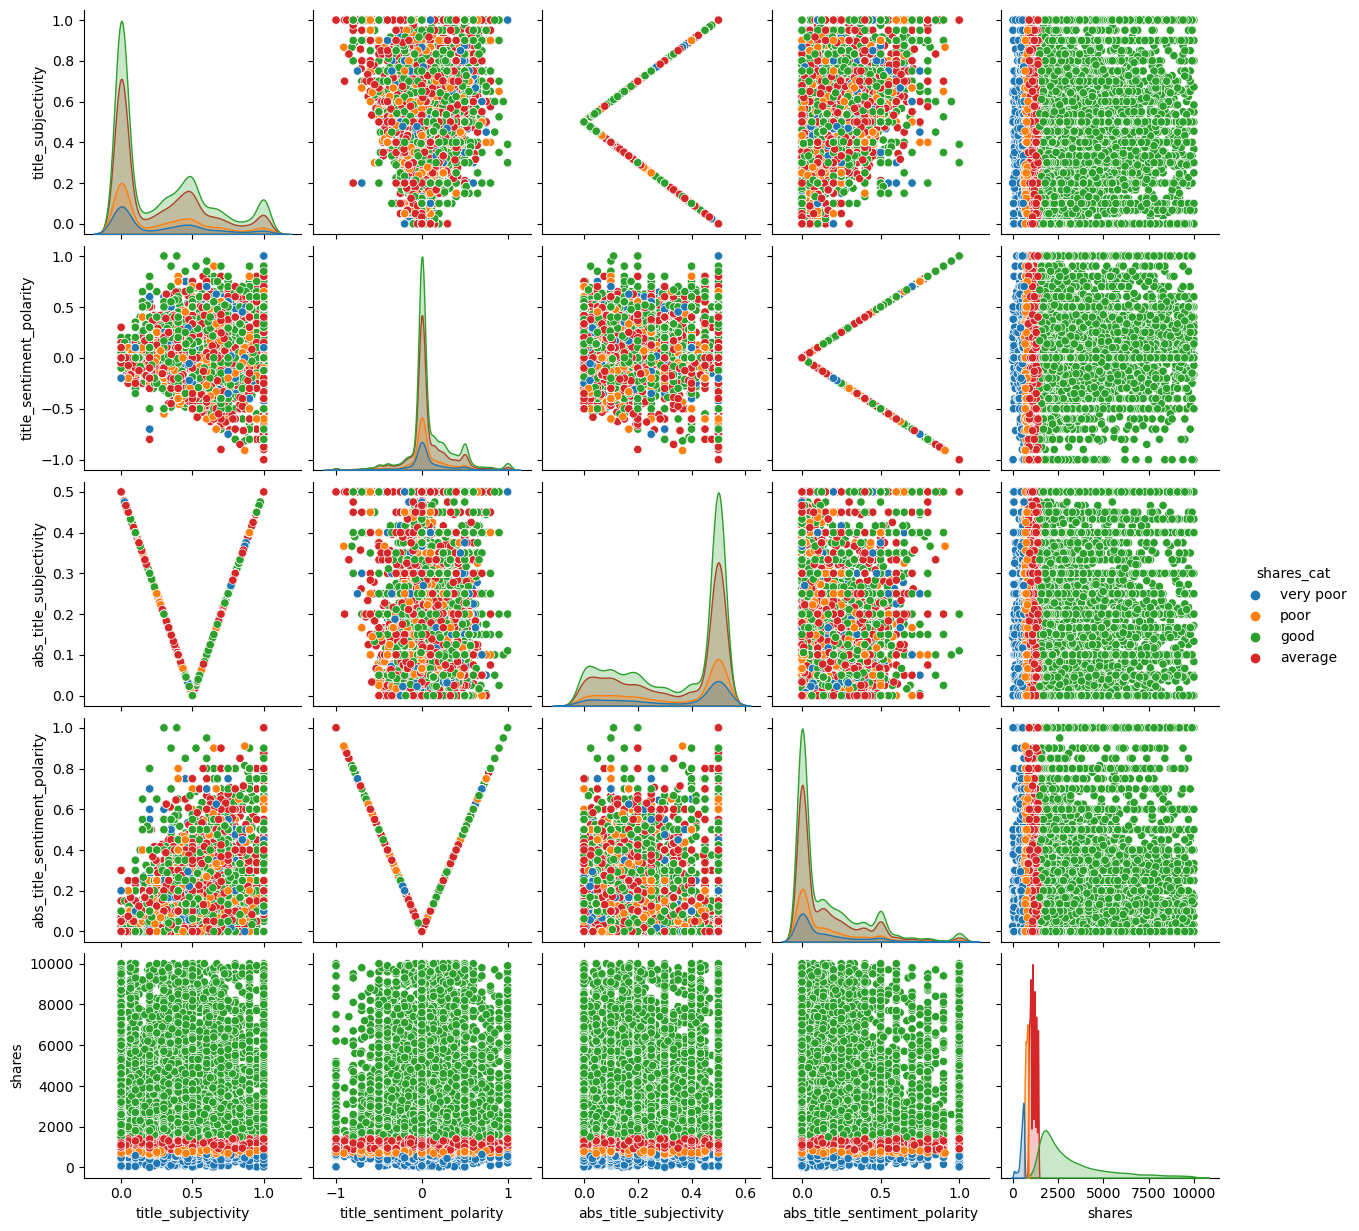

In [42]:
dat = df[df["shares"] <= 10000]
title = ["title_subjectivity", "title_sentiment_polarity", "abs_title_subjectivity", "abs_title_sentiment_polarity", "shares"]
sns.pairplot(dat, vars=title, hue='shares_cat', diag_kind='kde')

<Axes: xlabel='shares_cat', ylabel='count'>

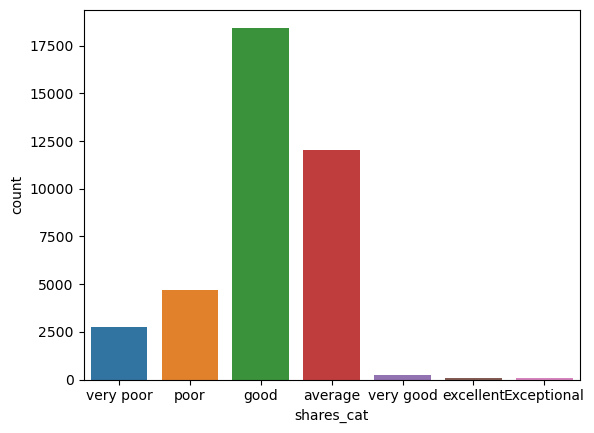

In [45]:
sns.countplot(df, x = "shares_cat")

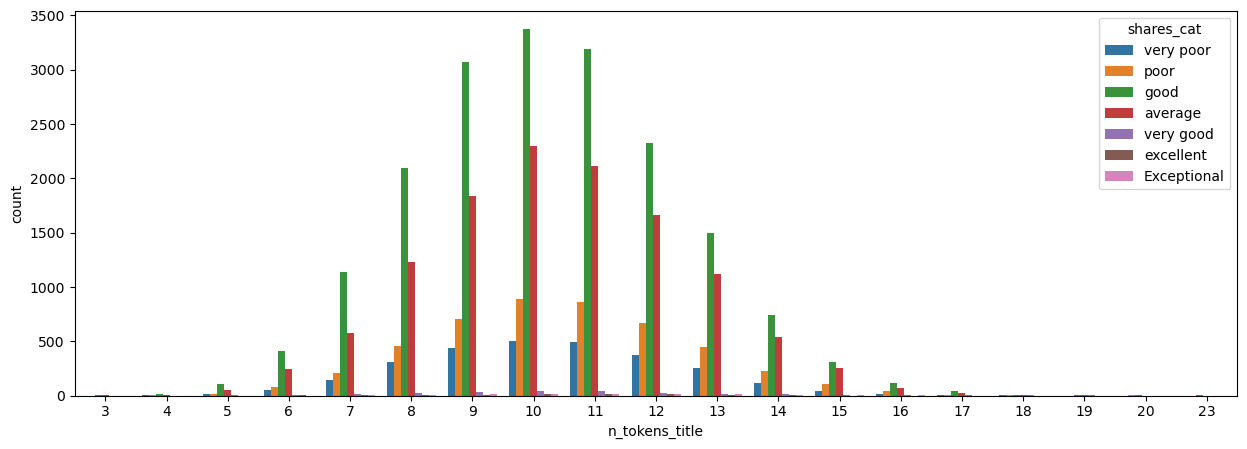

In [10]:
plt.figure(figsize=(15, 5))
splot = sns.countplot(df, x = "n_tokens_title", hue = "shares_cat")
for p in splot.patches:
    #print(p.get_xy())
    #splot.annotate(p.get_height(), p.get_xy())
    pass

<Axes: >

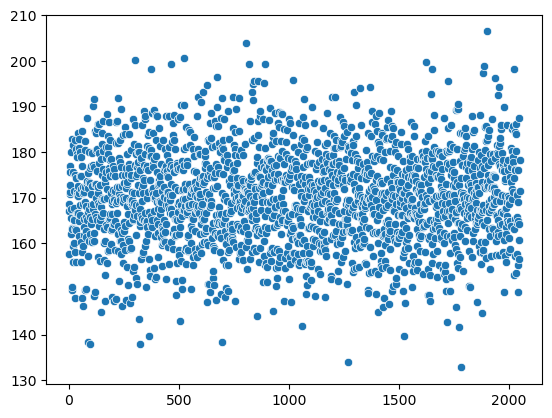

In [101]:
import numpy as np
x = np.random.normal(170, 10, 2050)
sns.scatterplot(x)

(array([  8.,  25., 113., 319., 543., 546., 331., 128.,  29.,   8.]),
 array([132.77548815, 140.14138498, 147.50728182, 154.87317865,
        162.23907548, 169.60497232, 176.97086915, 184.33676598,
        191.70266282, 199.06855965, 206.43445648]),
 <BarContainer object of 10 artists>)

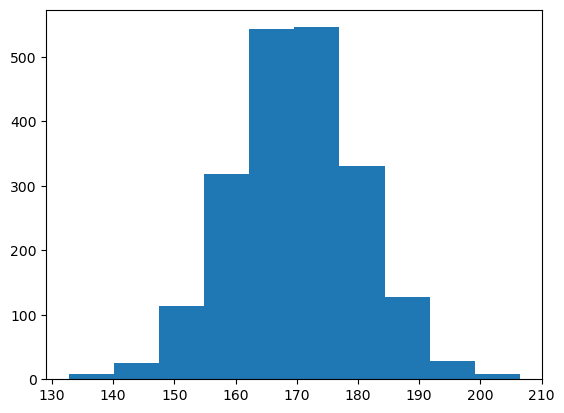

In [104]:
plt.hist(x, bins=10)